In [2]:
from roboflow import Roboflow
rf = Roboflow(api_key="mHvOg2nZux14itXk7w6Y")
project = rf.workspace("jeremy-sv8gv").project("lipread-yqfe8")
dataset = project.version(4).download("yolov7")


loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to LipRead-4 in yolov7pytorch:: 100%|██████████| 870/870 [00:00<00:00, 1200.37it/s]


# Begin Custom Training

We're ready to start custom training.

NOTE: We will only modify one of the YOLOv7 training defaults in our example: `epochs`. We will adjust from 300 to 100 epochs in our example for speed. If you'd like to change other settings, see details in [our accompanying blog post](https://blog.roboflow.com/yolov7-custom-dataset-training-tutorial/).

In [7]:
# run this cell to begin training
!python train.py --batch 8 --epochs 1000 --data /LipRead-4/data.yaml --weights yolov7_training.pt --device 0

^C


YOLOR  v0.1-126-g84932d7 torch 1.13.1 CUDA:0 (NVIDIA GeForce RTX 3060, 12287.5MB)

Namespace(weights='yolov7_training.pt', cfg='', data='.\\LipRead-4\\data.yaml', hyp='data/hyp.scratch.p5.yaml', epochs=1000, batch_size=16, img_size=[640, 640], rect=False, resume=False, nosave=False, notest=False, noautoanchor=False, evolve=False, bucket='', cache_images=False, image_weights=False, device='0', multi_scale=False, single_cls=False, adam=False, sync_bn=False, local_rank=-1, workers=8, project='runs/train', entity=None, name='exp', exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, upload_dataset=False, bbox_interval=-1, save_period=-1, artifact_alias='latest', freeze=[0], v5_metric=False, world_size=1, global_rank=-1, save_dir='runs\\train\\exp3', total_batch_size=16)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_

wandb: Install Weights & Biases for YOLOR logging with 'pip install wandb' (recommended)

autoanchor: Analyzing anchors... anchors/target = 5.83, Best Possible Recall (BPR) = 0.9973


# Evaluation

We can evaluate the performance of our custom training using the provided evalution script.

Note we can adjust the below custom arguments. For details, see [the arguments accepted by detect.py](https://github.com/WongKinYiu/yolov7/blob/main/detect.py#L154).

In [10]:
# Run evaluation
!python detect.py --weights runs/train/exp2/weights/best.pt --conf 0.1 --source c/images


Namespace(weights=['runs/train/exp2/weights/best.pt'], source='LipRead-4/test/images', img_size=640, conf_thres=0.1, iou_thres=0.45, device='', view_img=False, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=False)
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

1 A, Done. (12.0ms) Inference, (4.0ms) NMS
 The image with the result is saved in: runs\detect\exp3\WIN_20230525_17_27_08_Pro_jpg.rf.4bcf71f095ba8ba5b0740808cd488f95.jpg
1 U, Done. (11.0ms) Inference, (1.0ms) NMS
 The image with the result is saved in: runs\detect\exp3\WIN_20230525_17_28_50_Pro_jpg.rf.48dfcebed89b7b948497aba95c78d23f.jpg
1 U, Done. (13.0ms) Inference, (1.0ms) NMS
 The image with the result is saved in: runs\detect\exp3\WIN_20230525_17_29_12_Pro_jpg

YOLOR  v0.1-126-g84932d7 torch 1.13.1 CUDA:0 (NVIDIA GeForce RTX 3060, 12287.5MB)

c:\Users\jerem\.conda\envs\yolo\lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:3191.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 314 layers, 36503348 parameters, 6194944 gradients, 103.2 GFLOPS


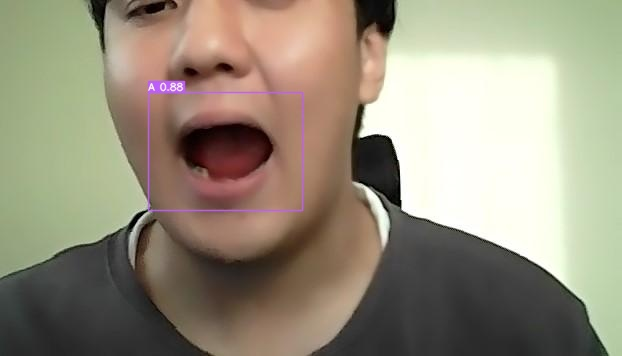

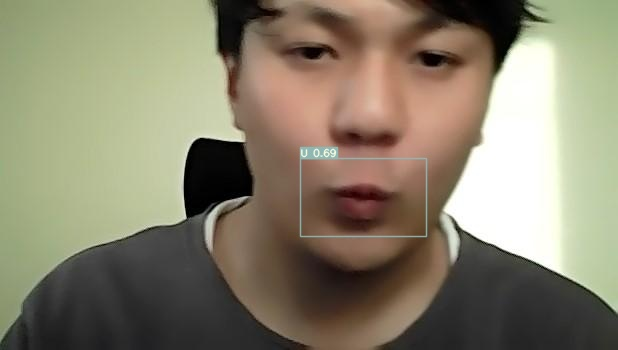

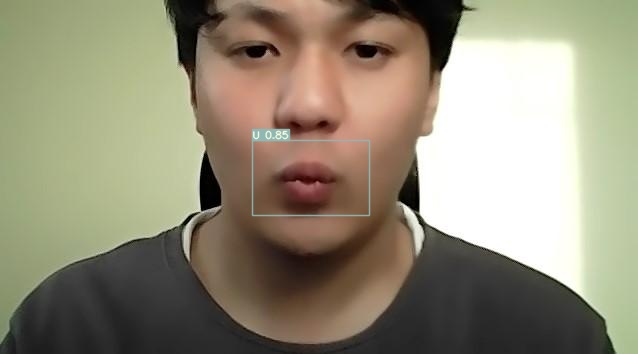

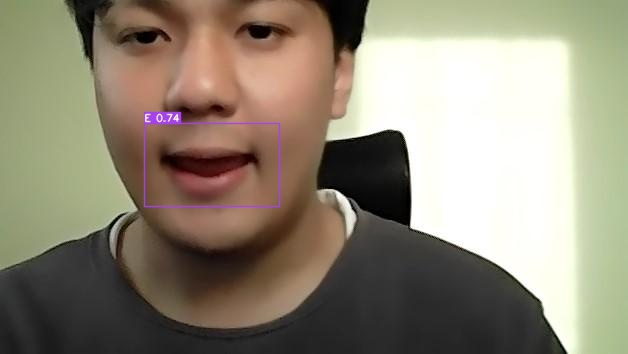

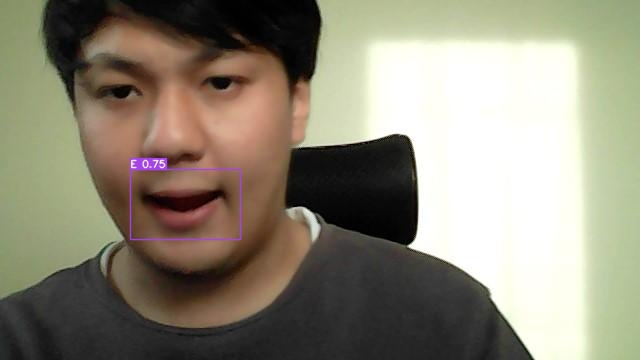

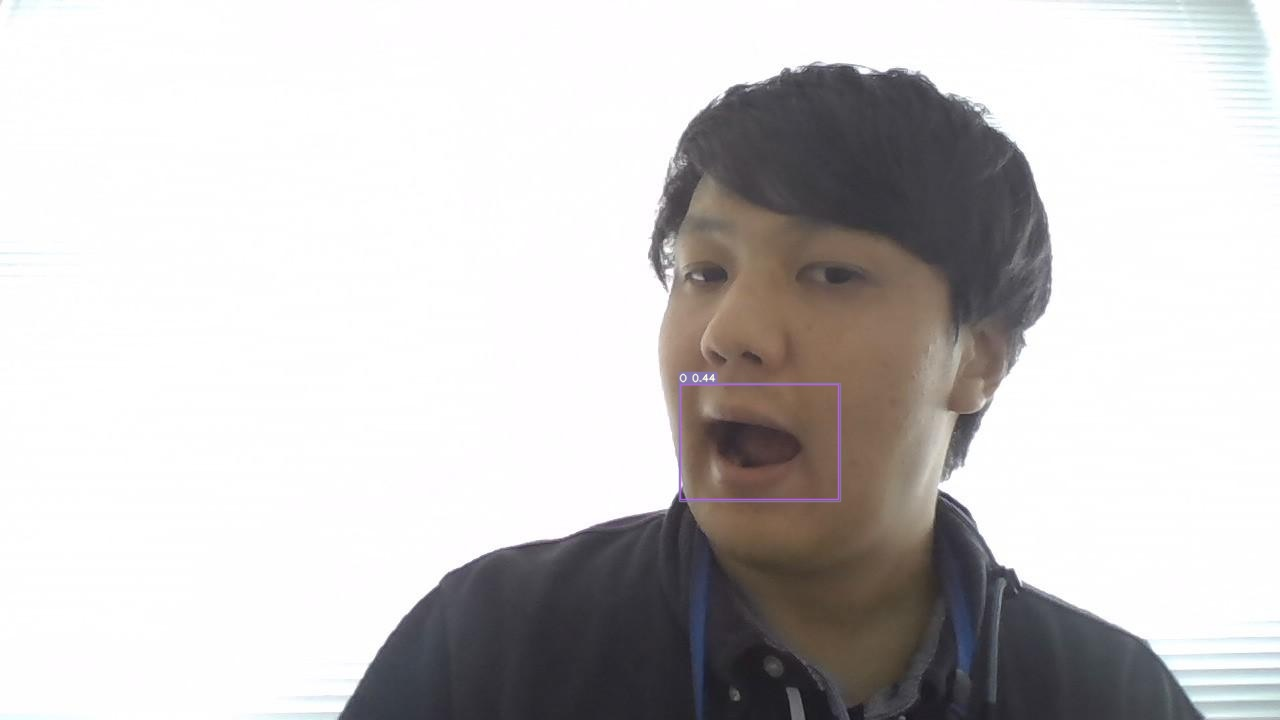

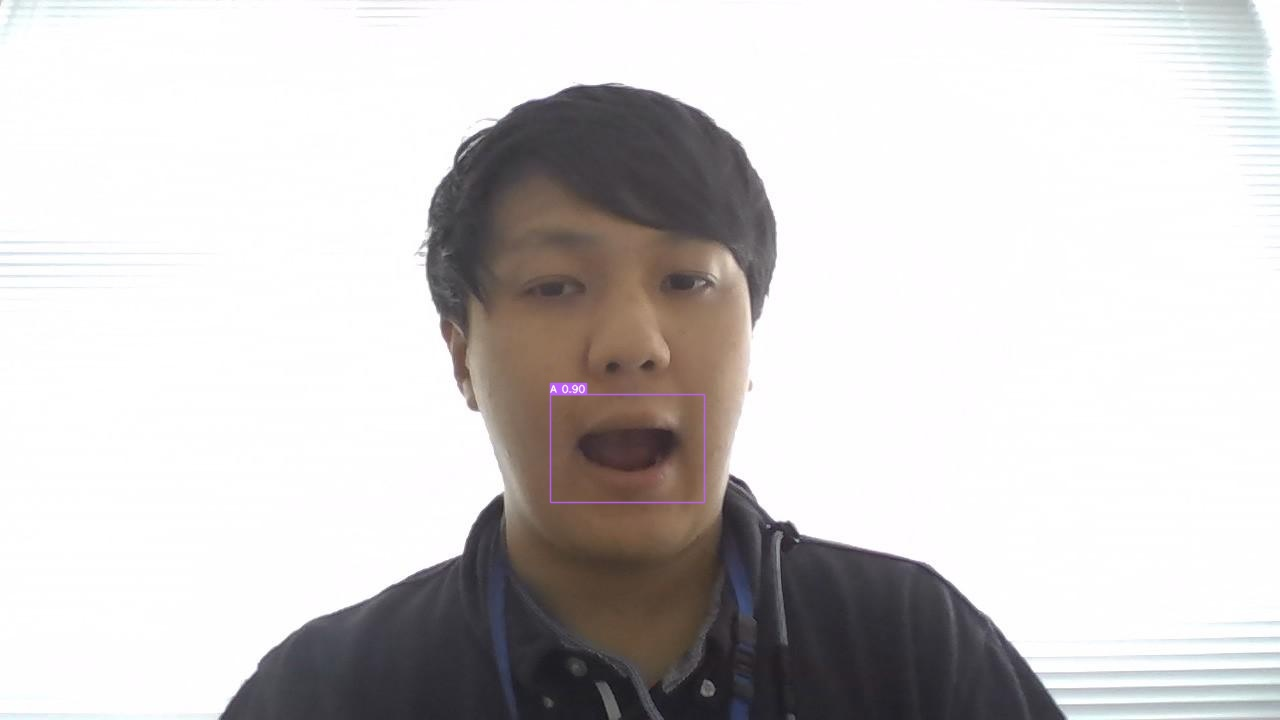

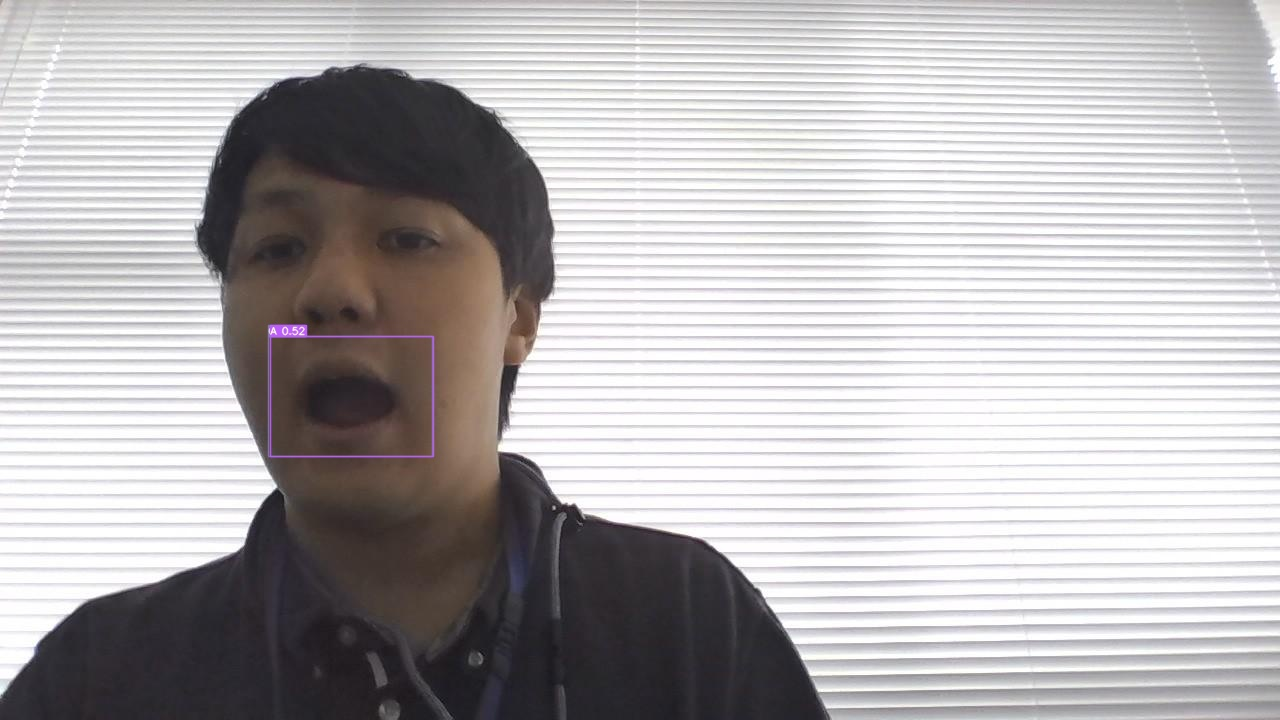

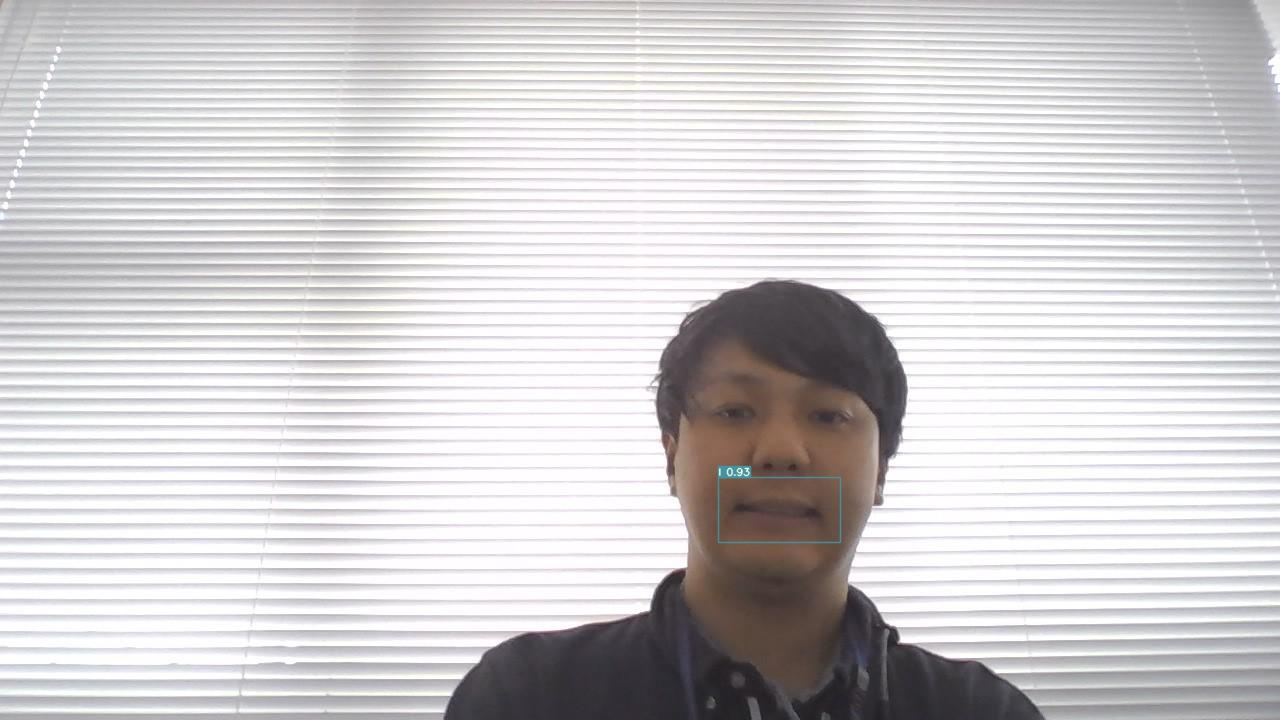

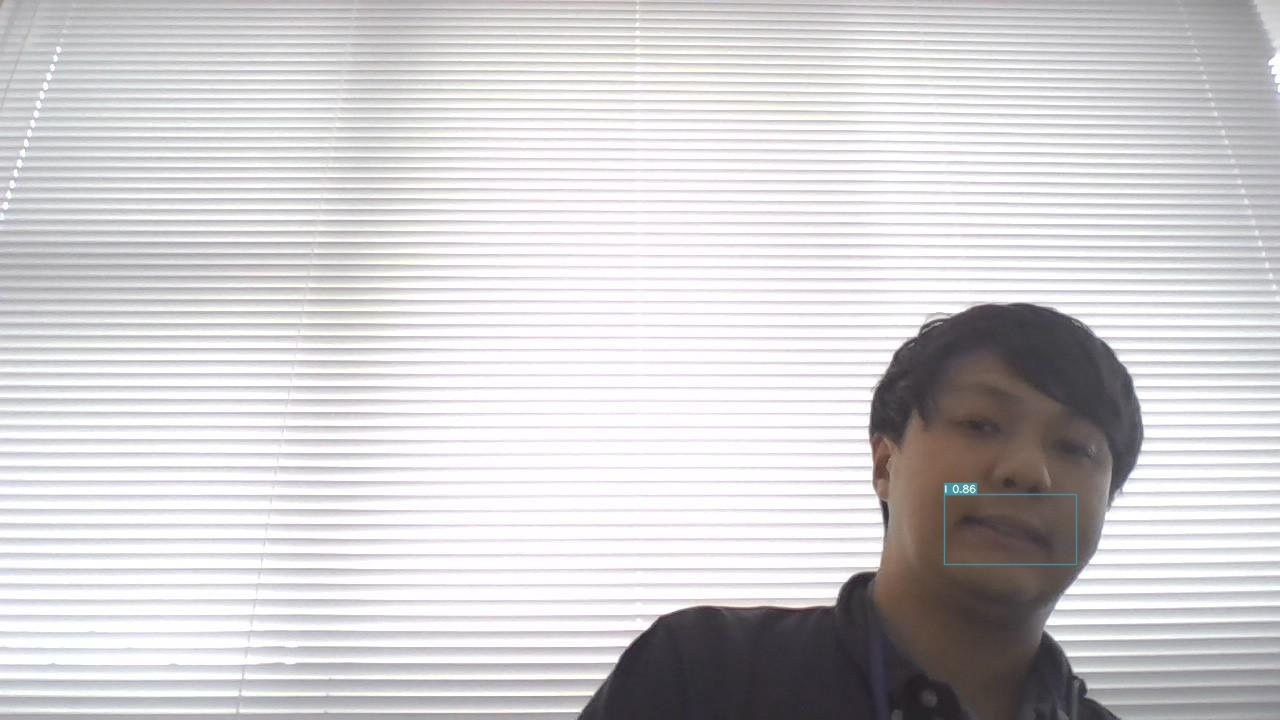

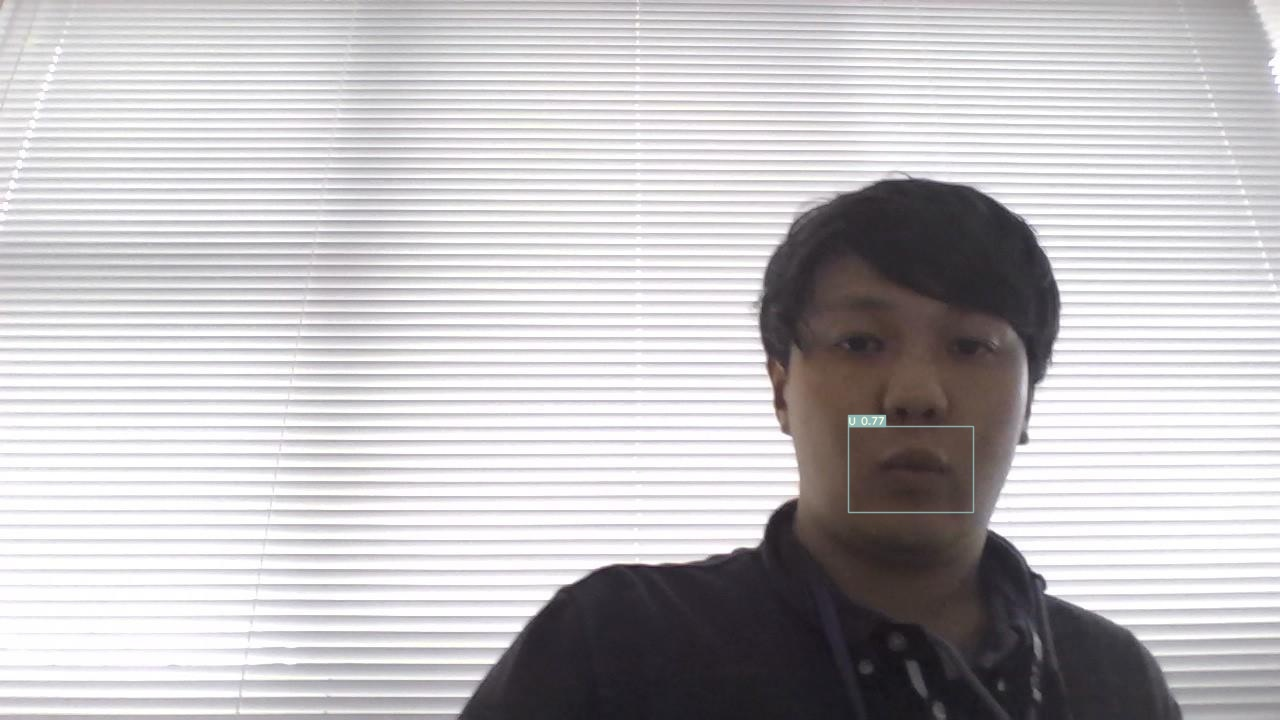

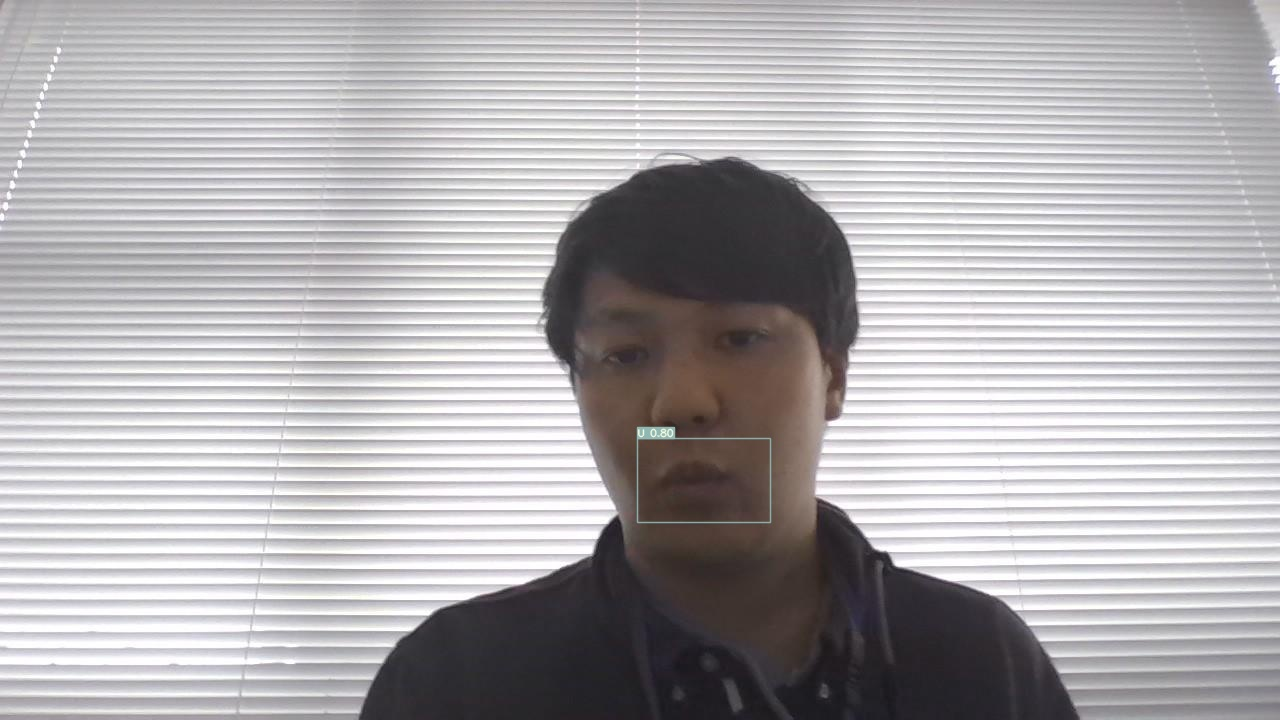

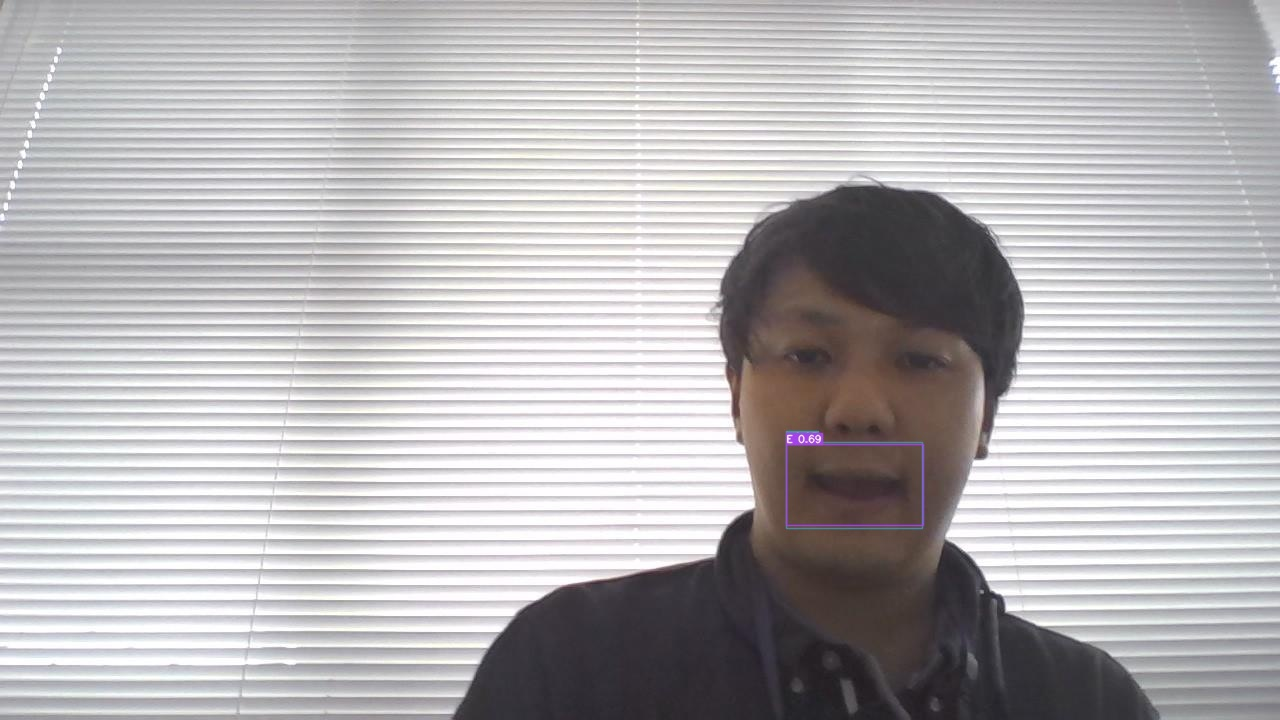

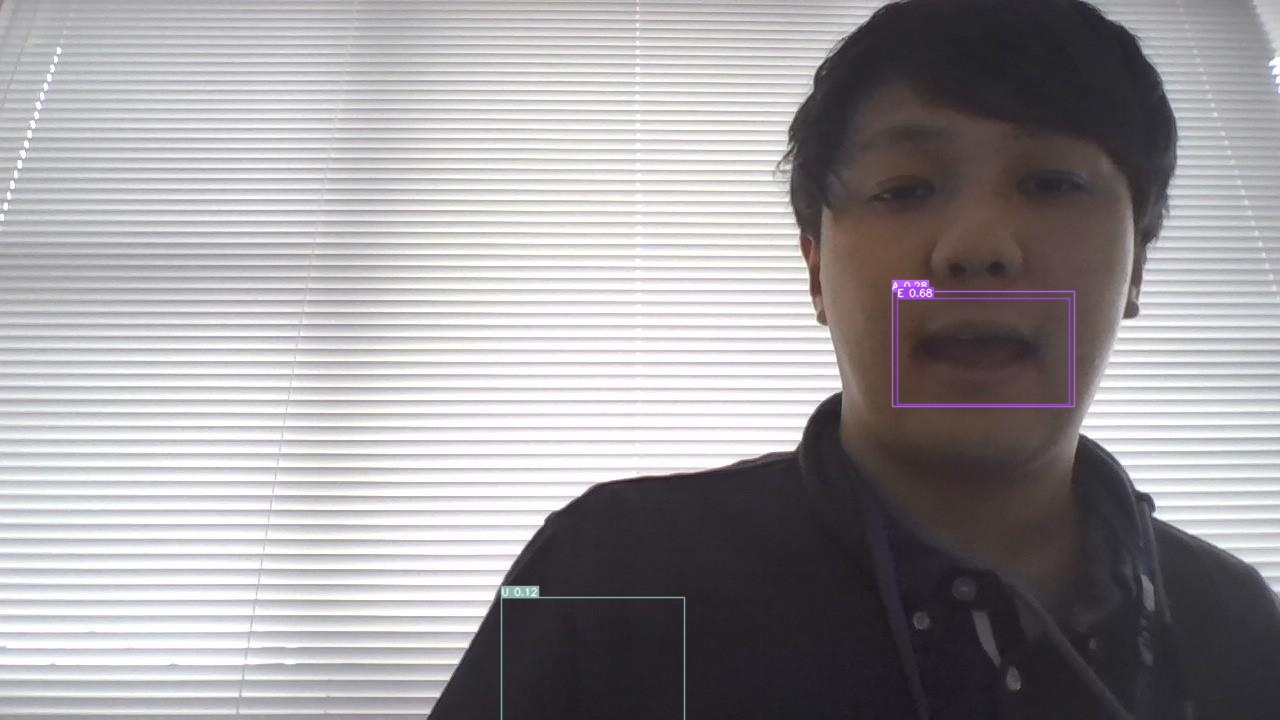

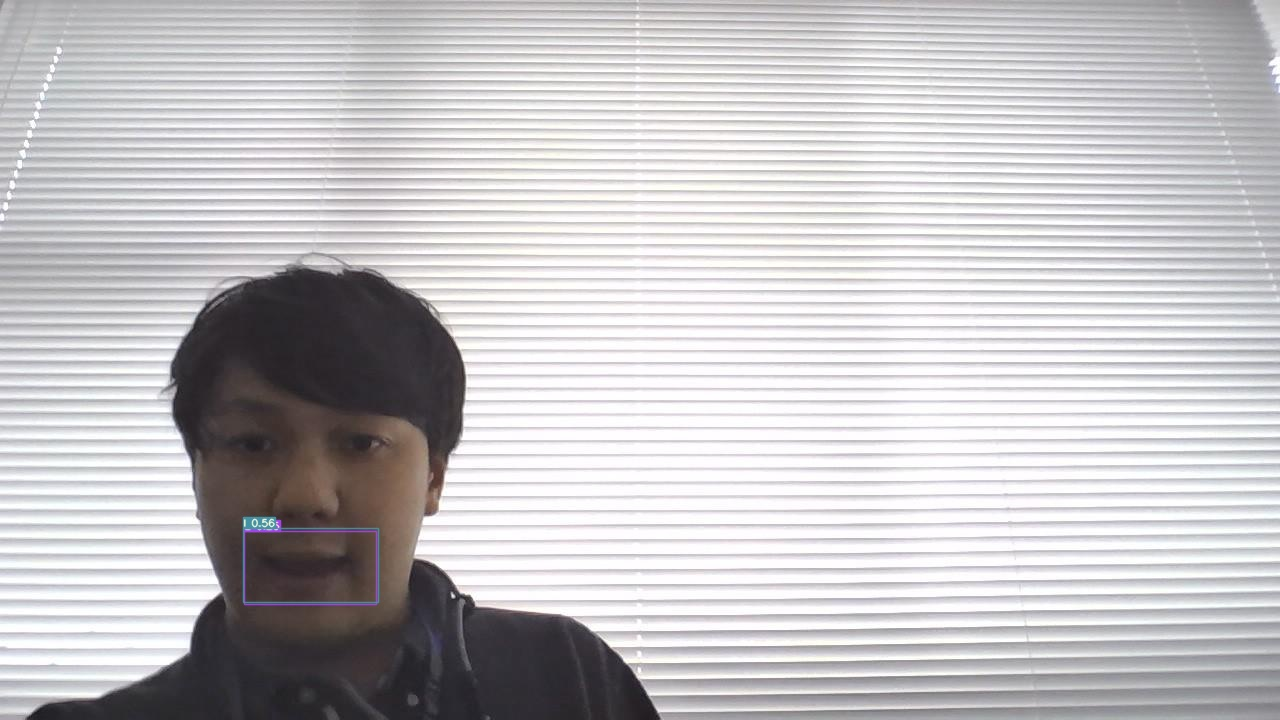

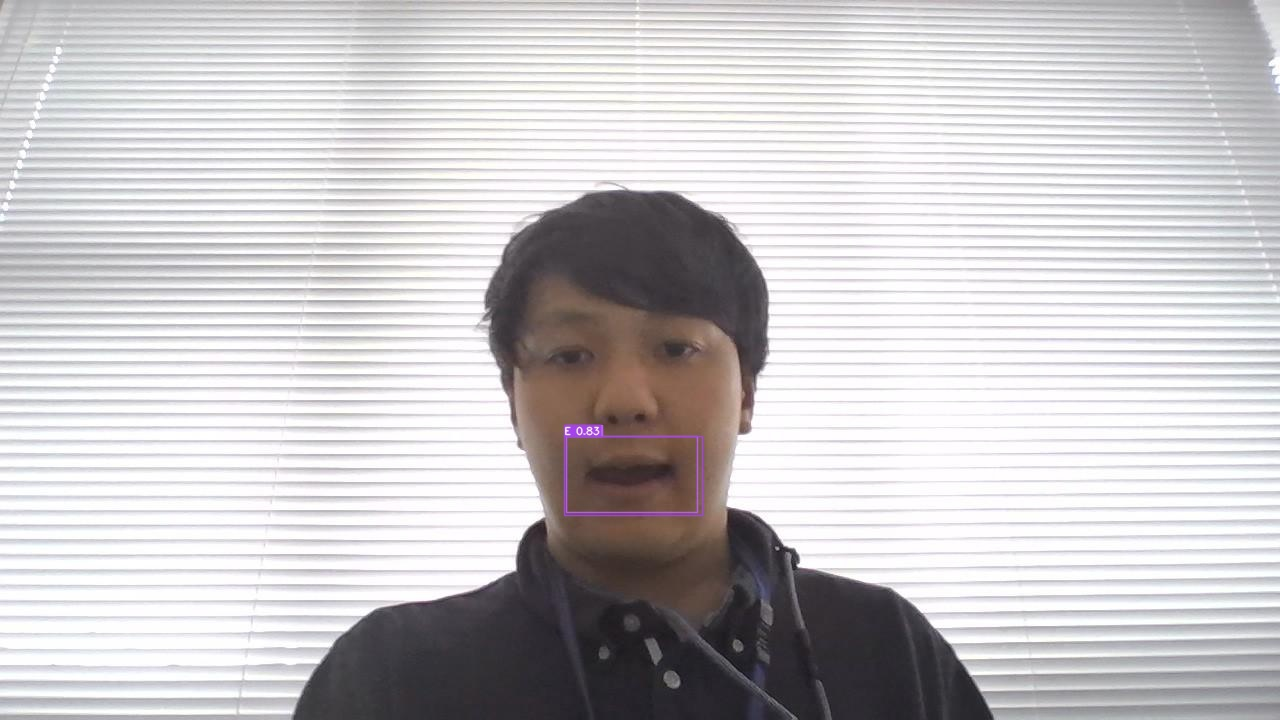

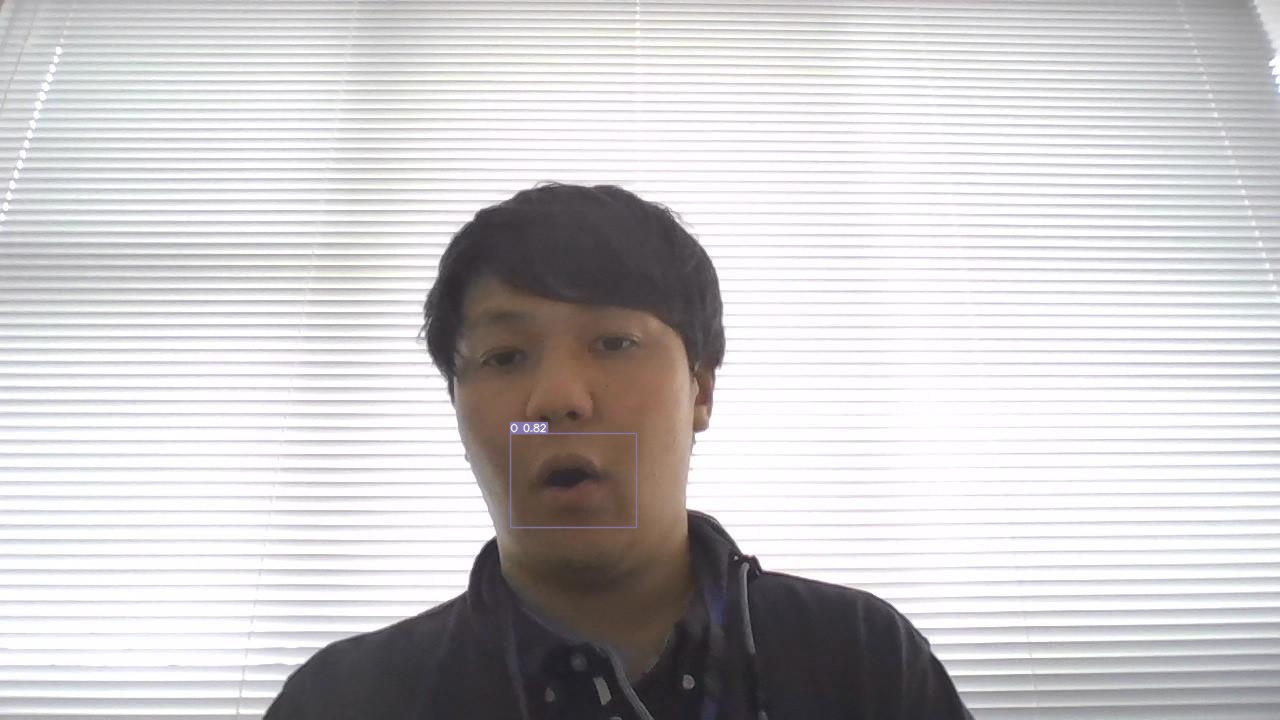

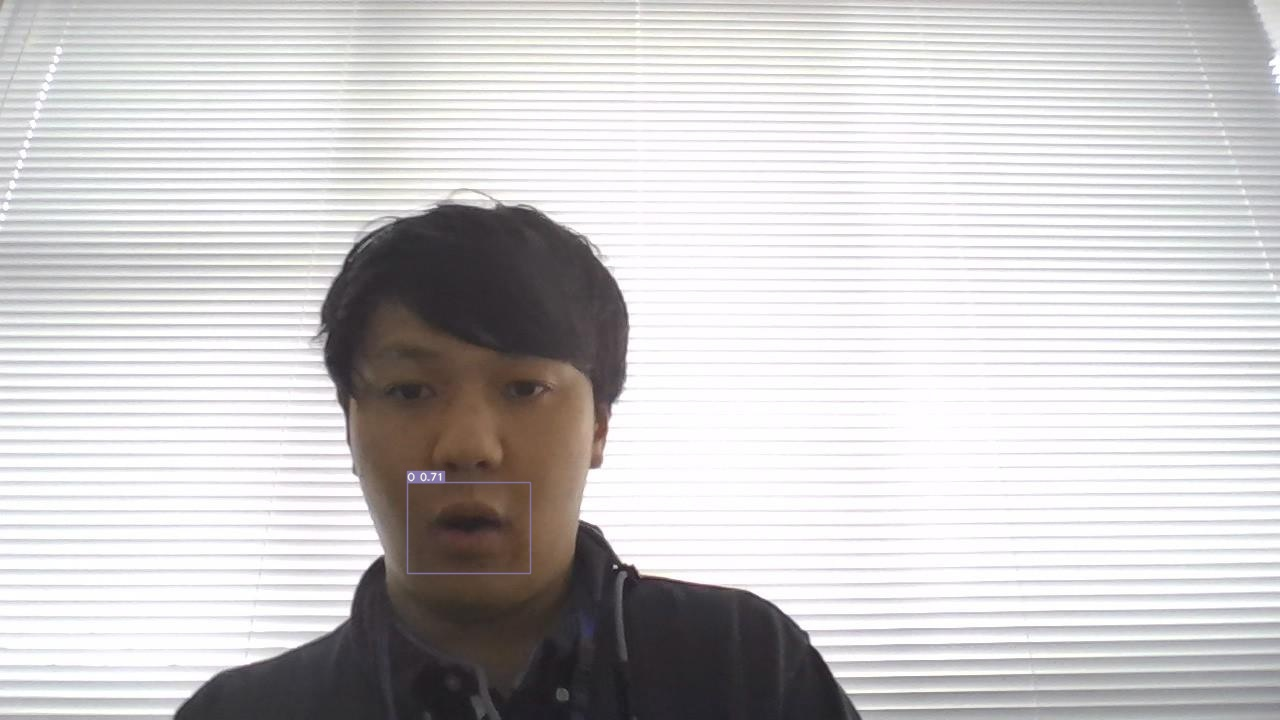

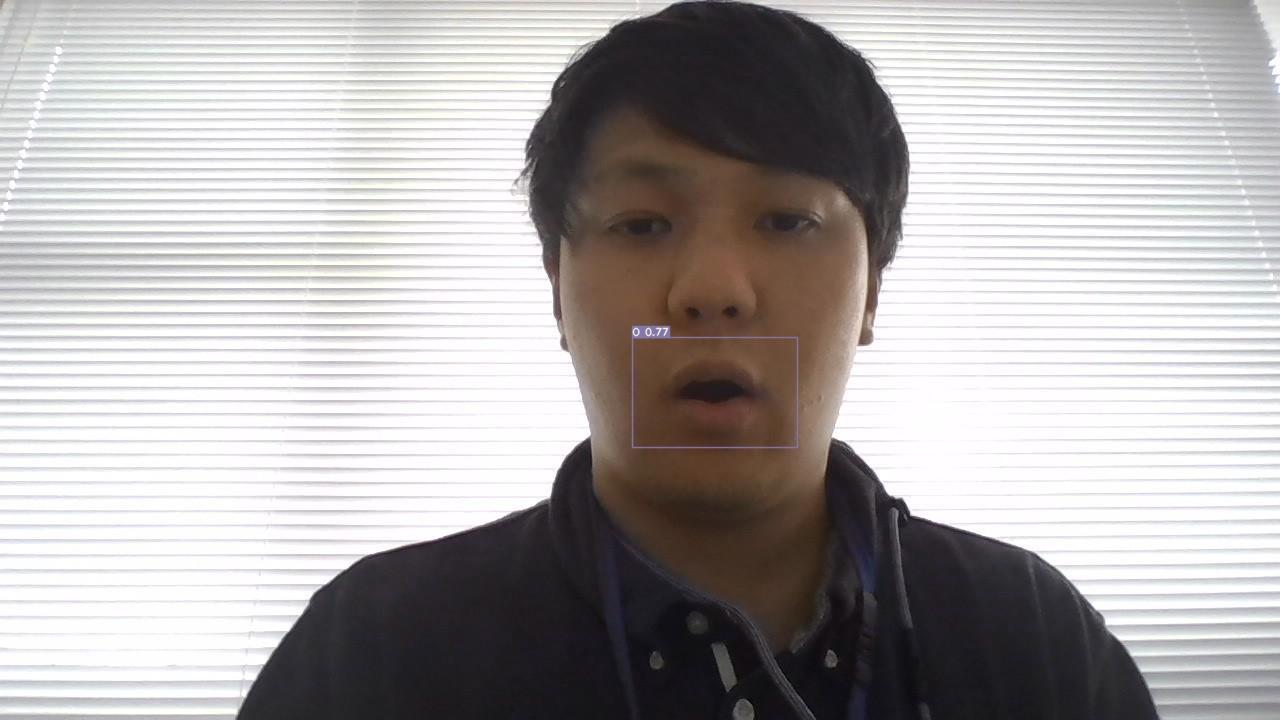

In [12]:
#display inference on ALL test images

import glob
from IPython.display import Image, display

i = 0
limit = 10000 # max images to print
for imageName in glob.glob('runs\detect\exp3\*.jpg'): #assuming JPG
    if i < limit:
      display(Image(filename=imageName))
      print("\n")
    i = i + 1
    

# Reparameterize for Inference

https://github.com/WongKinYiu/yolov7/blob/main/tools/reparameterization.ipynb

# OPTIONAL: Deployment

To deploy, you'll need to export your weights and save them to use later.

In [ ]:
# optional, zip to download weights and results locally

!zip -r export.zip runs/detect
!zip -r export.zip runs/train/exp/weights/best.pt
!zip export.zip runs/train/exp/*

# OPTIONAL: Active Learning Example

Once our first training run is complete, we should use our model to help identify which images are most problematic in order to investigate, annotate, and improve our dataset (and, therefore, model).

To do that, we can execute code that automatically uploads images back to our hosted dataset if the image is a specific class or below a given confidence threshold.


In [ ]:
# # setup access to your workspace
# rf = Roboflow(api_key="YOUR_API_KEY")                               # used above to load data
# inference_project =  rf.workspace().project("YOUR_PROJECT_NAME")    # used above to load data
# model = inference_project.version(1).model

# upload_project = rf.workspace().project("YOUR_PROJECT_NAME")

# print("inference reference point: ", inference_project)
# print("upload destination: ", upload_project)

In [ ]:
# # example upload: if prediction is below a given confidence threshold, upload it 

# confidence_interval = [10,70]                                   # [lower_bound_percent, upper_bound_percent]

# for prediction in predictions:                                  # predictions list to loop through
#   if(prediction['confidence'] * 100 >= confidence_interval[0] and 
#           prediction['confidence'] * 100 <= confidence_interval[1]):
        
#           # upload on success!
#           print(' >> image uploaded!')
#           upload_project.upload(image, num_retry_uploads=3)     # upload image in question

# Next steps

Congratulations, you've trained a custom YOLOv7 model! Next, start thinking about deploying and [building an MLOps pipeline](https://docs.roboflow.com) so your model gets better the more data it sees in the wild.